# **P1 Milestone 1** 💎

## Table of Contents 📚


## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004


**1. Introduction**
- 1.1 Introduction Statement
- 1.2 Problem Statement
- 1.3 Questions and Assumptions

**2.Query SQL**

**3.Import Libraries**

**4.Data Loading**

**5.Exploratory Data Analyst**

- 5.0 Descriptive statistics
- 5.1 Univariate analysis 
- 5.2 Bivariate analysis
- 5.3 VIF Multicolinearity test
- 5.4 A. Dealing with Duplicates
- 5.5 B. Dealing with Missing Values
- 5.6 C. Dealing with Outliers

**6. Feature Engineering**
- 6.0 Encoding
- 6.1 Scaling

**7. Model Training**
- 7.0 Logistic Regression
- 7.1 SVM
- 7.2 Decision Tree
- 7.3 Random Forest
- 7.4 KNN
- 7.5 Naive Baiyes
- 7.6 Other Algorithm (SGD)

**8. Model Evaluation**

**9. Cross Validation**

**10. Hyperparameter Tuning**
- 10.0 Grid Search CV
- 10.1 Random Search CV
- 10.3 Hyperparameter Tuning Conclusion


**11. Model Saving**

**12. Conceptual Problems**

**13. Model Strength Weakness and Improvement**

### A. Introduction Statement


Credit card default is a major concern for both credit card companies and consumers. When a credit card holder defaults on their payment, it can lead to financial losses for the credit card company and damage to the credit score of the individual. In this Milestone project, we aim to explore a dataset of credit card holders in Taiwan and develop a predictive model to identify those who are at high risk of defaulting on their payments.



### B. Problem Statement

The objective of this project is to analyze the credit card default dataset and build a model that can accurately predict whether a credit card holder will default on their payment in the next month based on their demographic and financial data, as well as their payment history. 

Specifically, we will explore the relationships between various features, such as age, education, payment history, and credit limit, and their impact on the likelihood of defaulting. We will also tune different machine learning models to identify the best performing model in terms of accuracy and F1 score, which can help credit card companies to identify high-risk customers and take proactive measures to prevent defaults.

### C. Questions and Assumptions



1. Assumptions: People with higher credit limits are more likely to default on credit card payments because they may be more willing to take on additional debt.
2. Assumptions: Credit card holders with lower levels of education may be more likely to default due to a lack of financial literacy or budgeting skills.
3. Is there a difference in default rates between male and female credit card holders?
4. Does age have an impact on default payment?
5. Relationship between continous and categorical data

These questions and assumptions will be answered in the EDA

## 2.QUERY SQL

Before importing the dataset to the notebook we will filter the bigquery dataset using `sql` for the columns needed.

```sql
SELECT 
  limit_balance,
  CAST(sex AS INT64) AS sex,
  CAST(education_level AS INT64) AS education_level,
  CAST(marital_status AS INT64) AS marital_status,
  age,
  pay_0,
  pay_2,
  pay_3,
  pay_4,
  CAST(pay_5 AS FLOAT64) AS pay_5,
  CAST(pay_6 AS FLOAT64) AS pay_6,
  bill_amt_1,
  bill_amt_2,
  bill_amt_3,
  bill_amt_4,
  bill_amt_5,
  bill_amt_6,
  pay_amt_1,
  pay_amt_2,
  pay_amt_3,
  pay_amt_4,
  pay_amt_5,
  pay_amt_6,
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM 
  `bigquery-public-data.ml_datasets.credit_card_default` AS credit
LIMIT 8016

```

I limit the data to only `8016` because 

- Batch: 004
- Year of birth: 2004

`2004*4 = 8016`

## 3. IMPORT LIBRARIES 💽

In [175]:
import pandas as pd
import numpy as np

#----------------------------

#Visualization for EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("crest")

#VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#----------------------------

# feature-engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#evaluasi
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import cross_val_score, cross_validate , StratifiedKFold

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#----------------------------

#save model
import joblib

pd.set_option('display.max_columns', None)

## 4. DATA LOADING 💽

In [107]:
df = pd.read_csv('/Users/karelhutajulu/Downloads/h8dsft_P1M1_Karel_Hutajulu.csv')

In [108]:
#Display top 10 rows of dataframe df
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,0.0,61454.0,61808.0,62290.0,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,0.0,49221.0,49599.0,50942.0,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,0.0,19568.0,19420.0,15535.0,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,0.0,18457.0,22815.0,27086.0,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,0.0,159919.0,68686.0,161192.0,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,-1.0,54053.0,65235.0,64747.0,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [109]:
#Display top 10 rows of dataframe df
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,12878.0,7702.0,2377.0,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-100.0,100.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,5280.0,5000.0,5000.0,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,96.0,780.0,0.0,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,4280.0,2800.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,752.0,300.0,5880.0,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1473.0,390.0,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-70.0,9540.0,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


### Simple Data Understanding before we explore 🔍

In [110]:
df.dtypes

limit_balance                 float64
sex                             int64
education_level                 int64
marital_status                  int64
age                           float64
pay_0                         float64
pay_2                         float64
pay_3                         float64
pay_4                         float64
pay_5                         float64
pay_6                         float64
bill_amt_1                    float64
bill_amt_2                    float64
bill_amt_3                    float64
bill_amt_4                    float64
bill_amt_5                    float64
bill_amt_6                    float64
pay_amt_1                     float64
pay_amt_2                     float64
pay_amt_3                     float64
pay_amt_4                     float64
pay_amt_5                     float64
pay_amt_6                     float64
default_payment_next_month      int64
dtype: object

Datatypes is good and no data that is supposed to be numerical datatype has a datatype of string. This means that our convert datatype process in sql worked.

Now we verify all the column names

In [111]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')


In [112]:
df.shape

(2965, 24)

Finally, before starting EDA, it is best if we make sure we understand all the definition of the columns:

1. `limit_balance`: the credit limit on the customer's credit card account
2. `sex`: the customer's gender (1 = male, 2 = female)
3. `education_level`: the customer's education level (1 = graduate school, 2 = university, 3 = high school, 4 = other)
4. `marital_status`: the customer's marital status (1 = married, 2 = single, 3 = other)
5. `age`: the customer's age in years
6. `pay_0, pay_2, pay_3, pay_4, pay_5, pay_6`: (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
7. `bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6`: the amount of bill statement in the past 6 months (bill_amt_1 = amount of bill statement in September, bill_amt_2 = amount of bill statement in August, bill_amt_3 = amount of bill statement in July, etc.)
8. `pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6`: the amount of payment in the past 6 months (pay_amt_1 = amount paid in September, pay_amt_2 = amount paid in August, pay_amt_3 = amount paid in July, etc.)
9. `default_payment_next_month`: whether the customer will default on their credit card payment next month (1 = yes, 0 = no)

The minimum payment refers to the minimum amount that a credit card holder must pay each month to keep their account in good standing.

## 5. EXPLORATORY DATA ANALYSIS (EDA) 🎁

### A. Descriptive Statistic

First step of EDA, we will do descriptive statistic, this will give us a feel of how the data is distributed and if there are any anomalies.

In [113]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Looks like there are no anomalies and all value are in a 'realistic' range.

### B. Univariate Analysis

Numerical Variables Distribution:

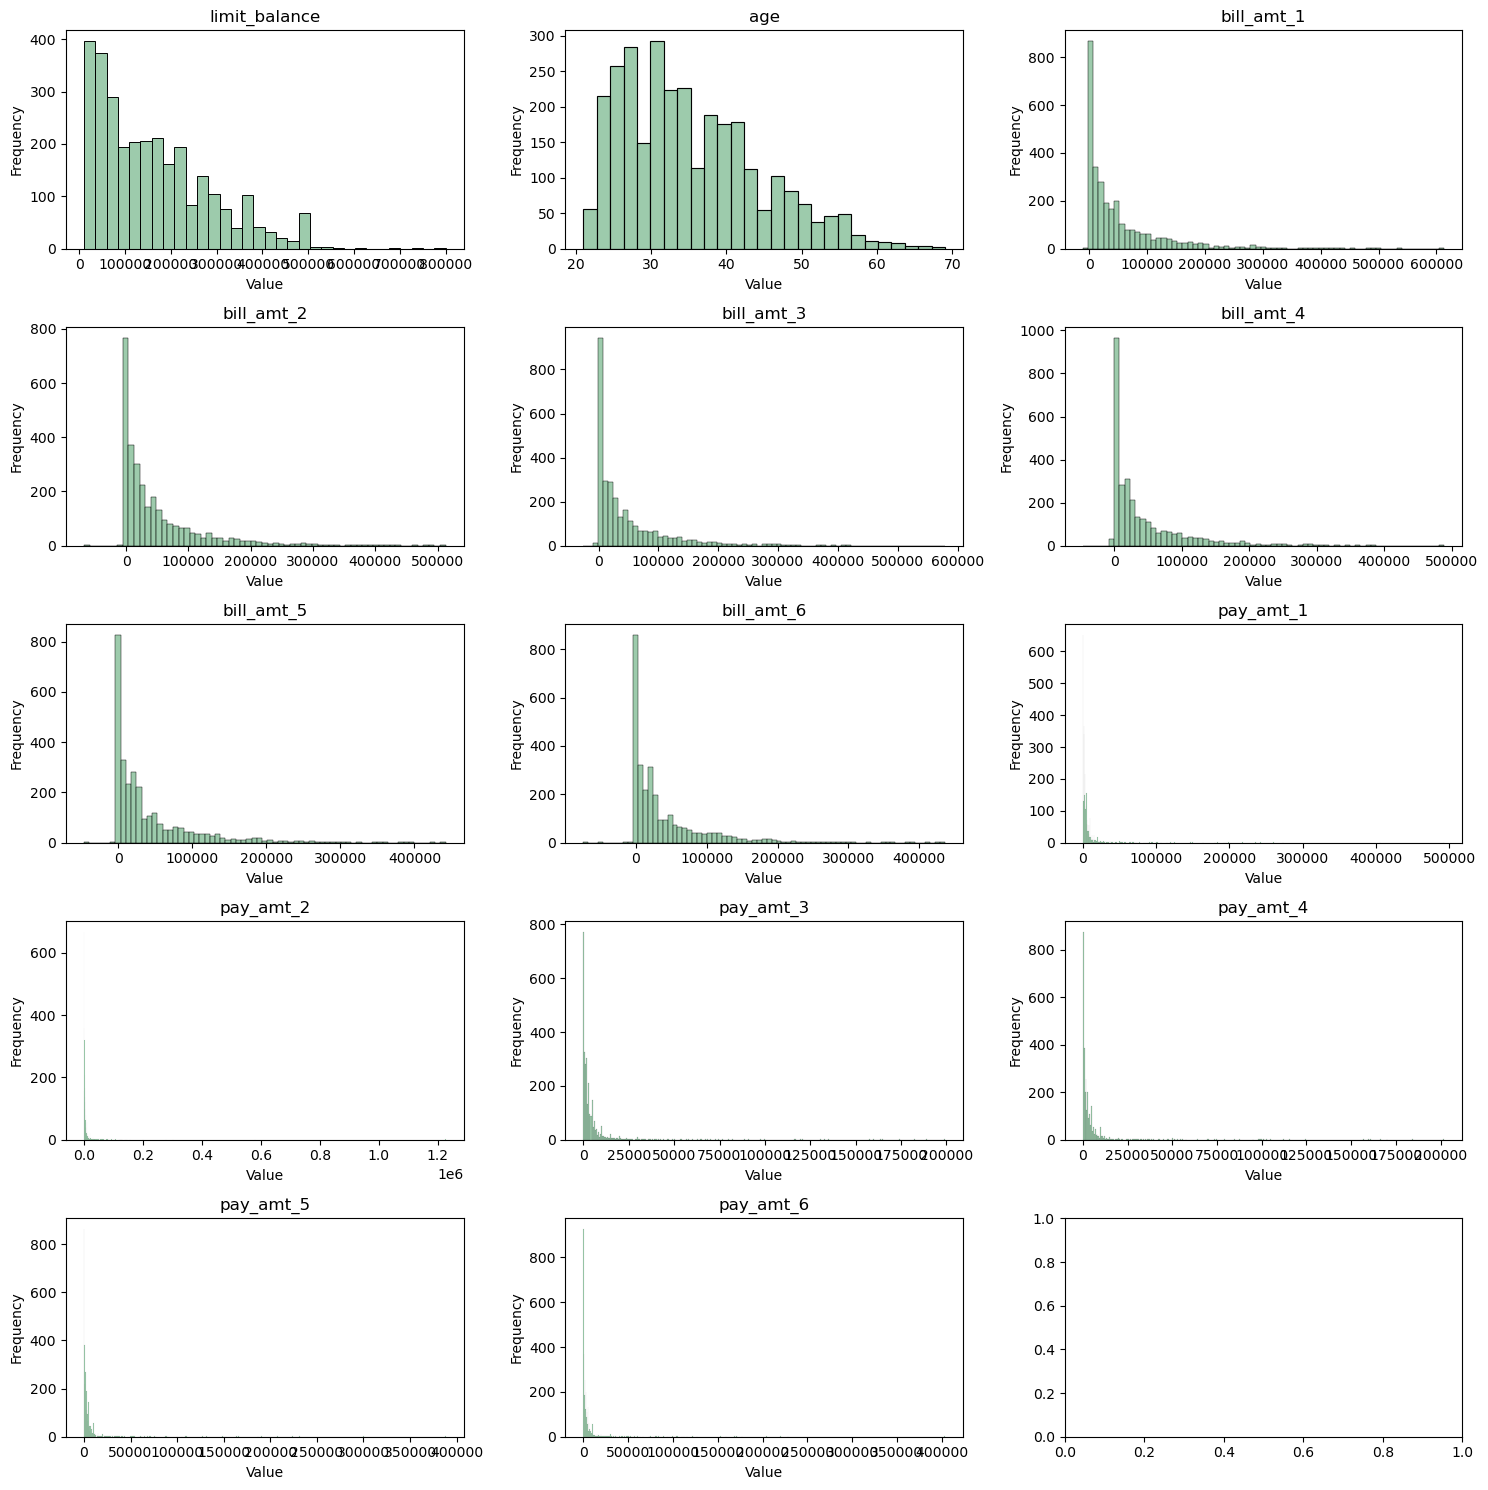

In [114]:
# Define the numerical variables
n_val = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

# Plot a histogram for each numerical column
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
for i, col in enumerate(n_val):
    sns.histplot(df[col], ax=axs[i//3][i%3])
    axs[i//3][i%3].set_title(col)
    axs[i//3][i%3].set_xlabel('Value')
    axs[i//3][i%3].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


**Observation:** 

Each column has a right skewed distribution, this make sense for bill_amt and pay_amt because limit_balance is also right skewed. More people pay less payment (pay_amt) and have low billing(bill_amt) because more people have a lower limit(limit_balance)

Categorical Variables Distribution:

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


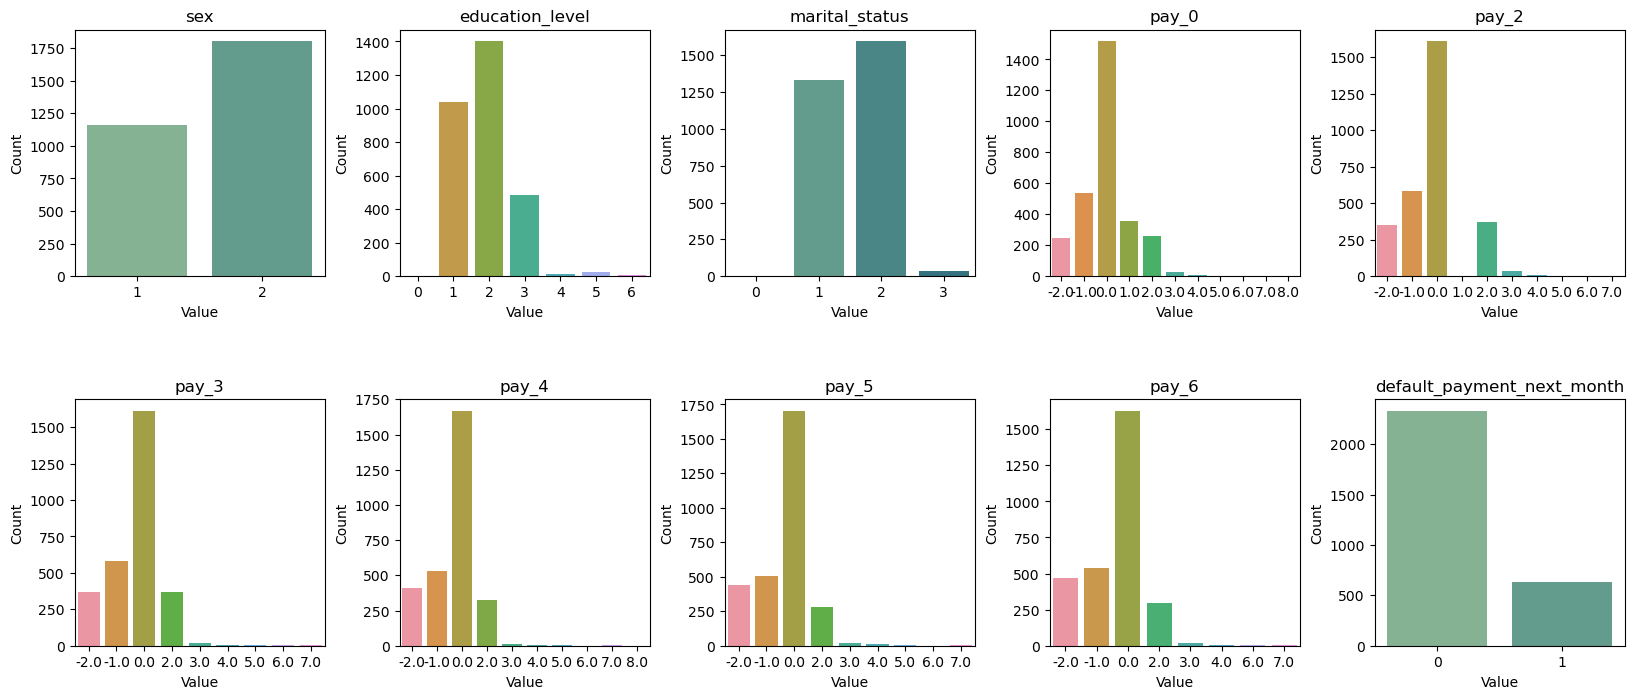

In [115]:
# Define the categorical variables
c_val = ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), tight_layout=True, 
                         gridspec_kw={"hspace": 0.5, "wspace": 0.3})

# Plot a bar chart for each categorical column
for col, ax in zip(c_val, axes.flatten()):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Hide unused subplots
for ax in axes.flatten()[len(c_val):]:
    ax.axis('off')

plt.show()


**Observation:** 
There are more female data then male data, education level is mostly university and marital status is mostly single. Most users are not late on default payment.

As you can see,there is an imbalance in the dataset and in the next sections this will prove to be an issue.

### C. Bivariate Analysis

Relationship between Sex and Target variable

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


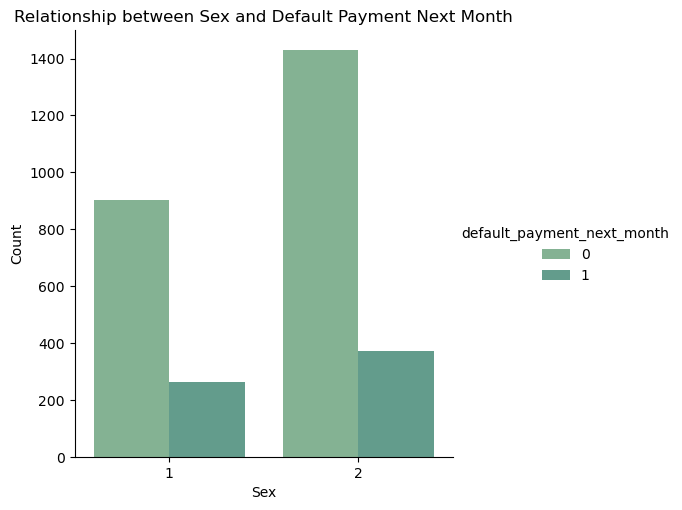

In [116]:

# Create bar plot
sns.catplot(x='sex', hue='default_payment_next_month', kind='count', data=df)

# Set plot title and labels
plt.title('Relationship between Sex and Default Payment Next Month')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show plot
plt.show()


**Observation:** 
Based on the proportion, male are more likely to default_payment compared to woman.

Relationship between Marital Status and Target variable

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


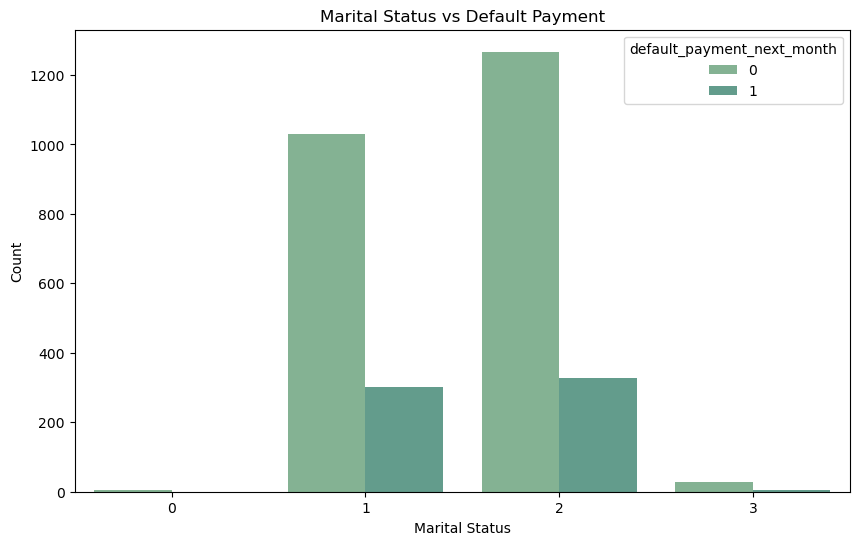

In [117]:
# Countplot for 'marital_status' with 'default_payment_next_month' as hue
plt.figure(figsize=(10,6))
sns.countplot(x='marital_status', data=df, hue='default_payment_next_month')
plt.title('Marital Status vs Default Payment')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

**Observation:** 
Based on the proportion, Married clients are more likely to default payment compared to married clients

Relationship between Education Level and Target variable

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


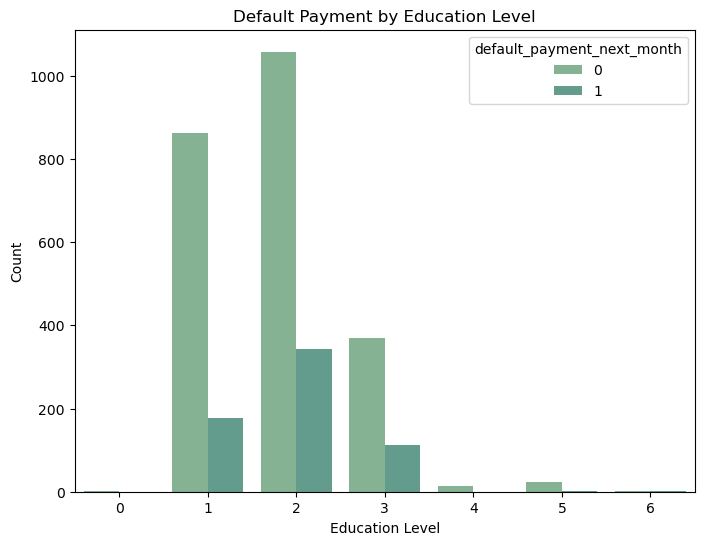

In [118]:
plt.figure(figsize=(8,6))
sns.countplot(x='education_level', hue='default_payment_next_month', data=df)
plt.title('Default Payment by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


**Observation:** 
Based on the proportion, Highschool graduates are more likely to default payment compared to University graduates and other education levels. This may indicate that people with lower degrees in learning are worse in managing money and payments compared to people in higher education

Relationship between pay_0-pay_6 and Target variable

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


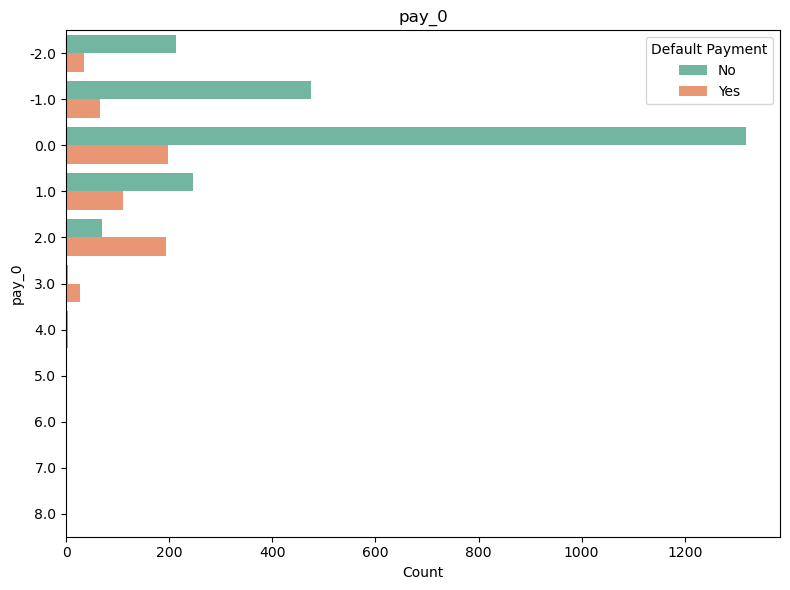

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


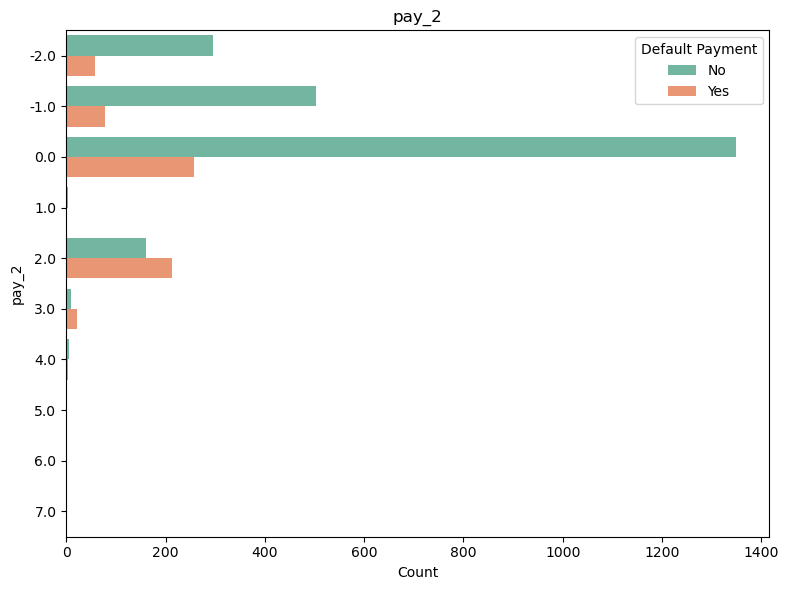

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


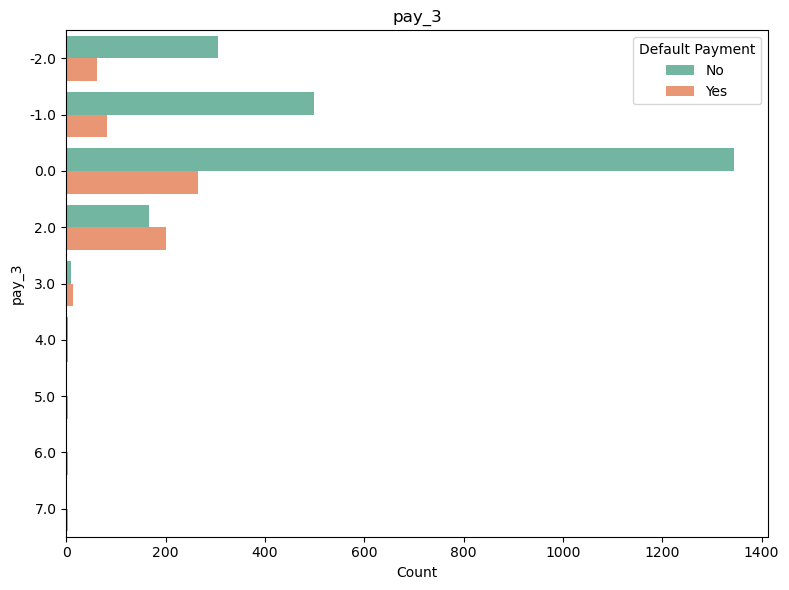

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


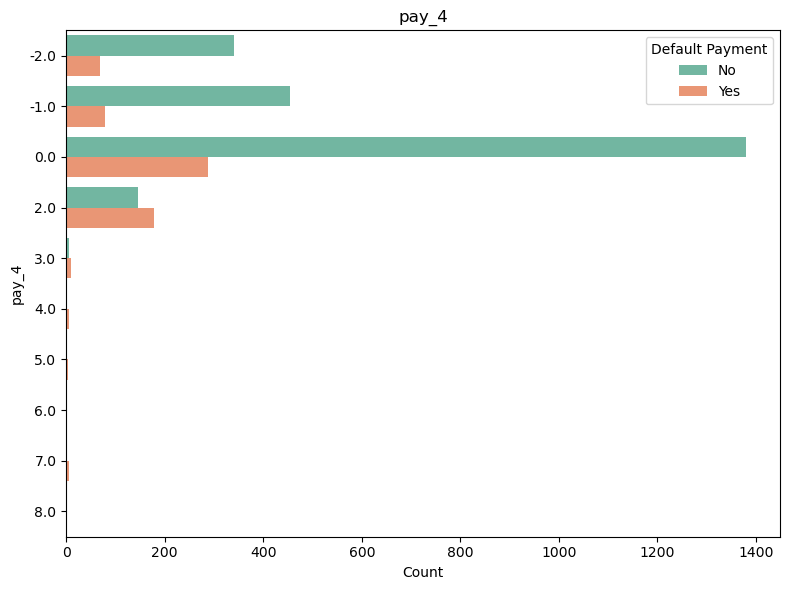

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


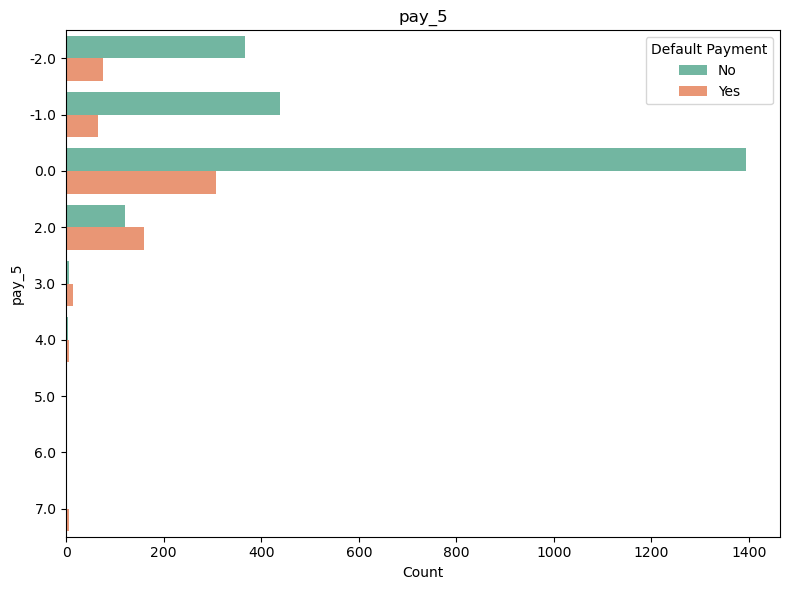

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


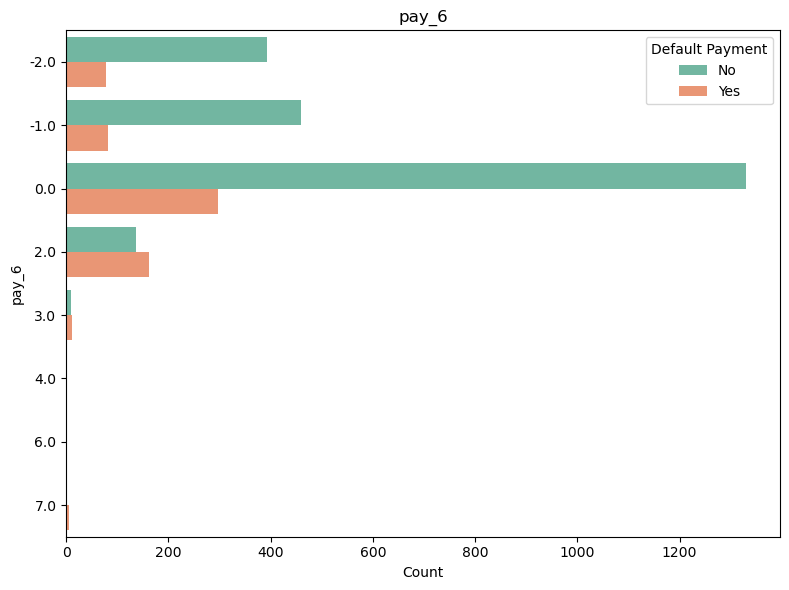

In [119]:
# Plot a bar chart for each categorical column
for col in c_val[3:-1]:
    plt.figure(figsize=(8,6))
    ax = sns.countplot(y=col, hue='default_payment_next_month', data=df, palette='Set2')
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('{}'.format(col))
    plt.legend(title='Default Payment', loc='upper right', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

**Observation:** 
Based on the distribution, pay is divided equally between the six months.

Distribution of credit limit and Target variable

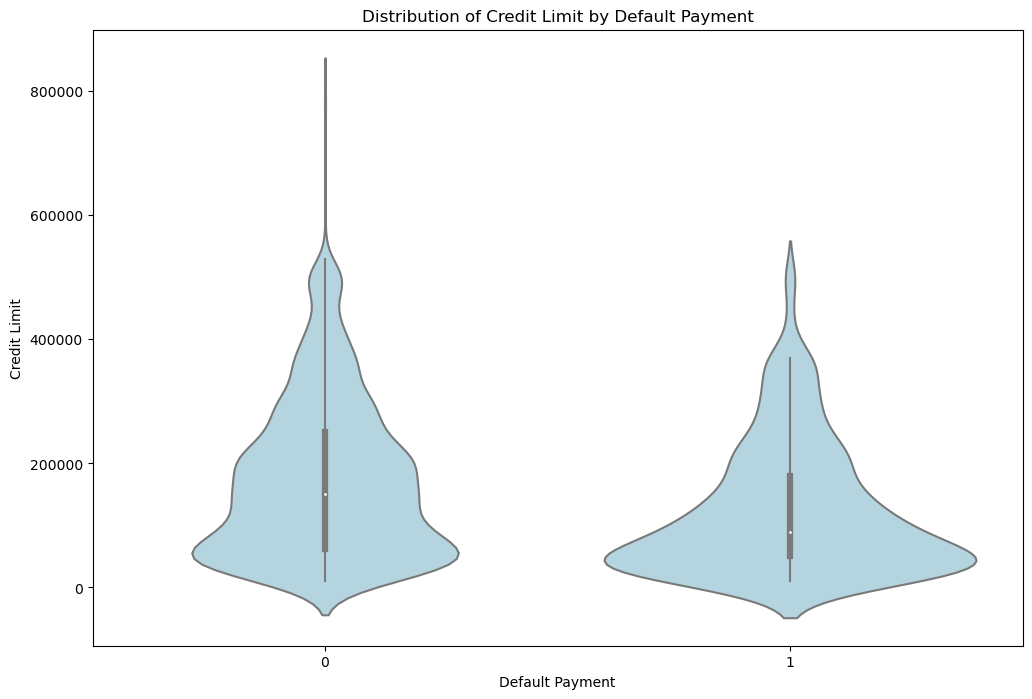

In [120]:
# create boxplot and violin plot for limit_balance by default payment
plt.figure(figsize=(12, 8))
sns.violinplot(x='default_payment_next_month', y='limit_balance', data=df, color='lightblue')
plt.title('Distribution of Credit Limit by Default Payment')
plt.xlabel('Default Payment')
plt.ylabel('Credit Limit')
plt.show()


**Observation:** 
The payment category 0 appears to have a higher density of lower credit limits, as indicated by the skinnier violin shape, and a longer line extending from the violin. This suggests that individuals in payment category 0 may have lower credit limits on average compared to those in payment category 1.

On the other hand, payment category 1 appears to have a wider violin shape, indicating a broader range of credit limits. However, it does not have a long line extending from the violin, suggesting that there may be fewer outliers or extreme values in this category.

Distribution of age and Target variable

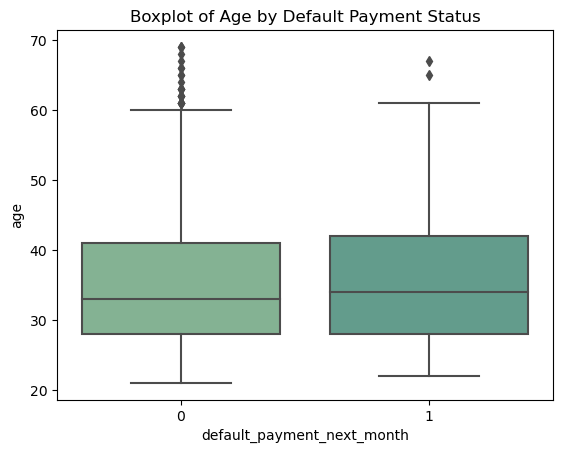

In [121]:
sns.boxplot(x='default_payment_next_month', y='age', data=df)
plt.title('Boxplot of Age by Default Payment Status')
plt.show()


**Observation:** 

Similar distribution, default_payment 0 has more outliers and slighly lower median and iqr

Correlation between Numerical Variables

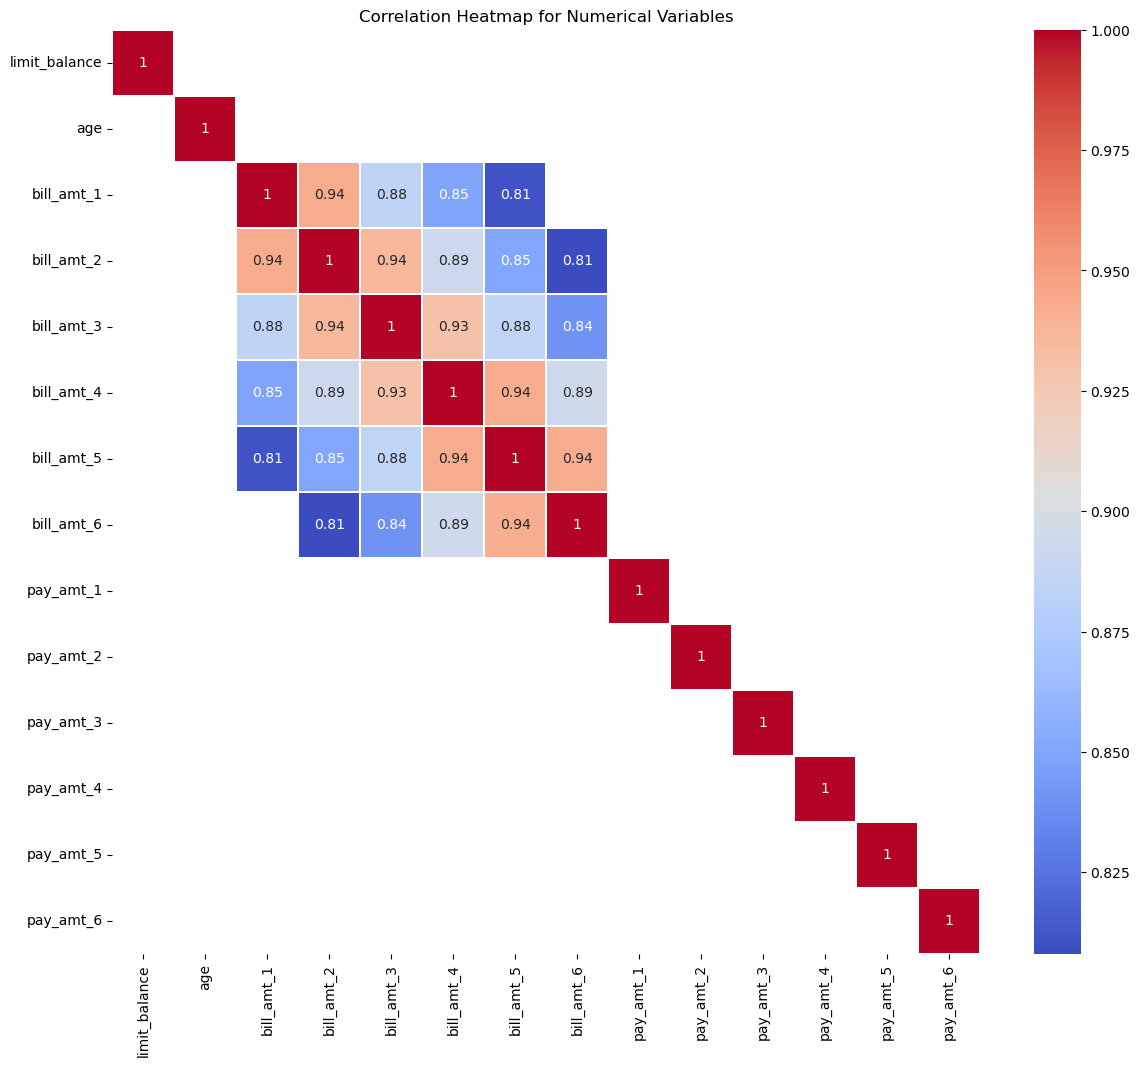

In [122]:
# Extract numerical variables
n_val = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
df_num = df[n_val]

# Create correlation heatmap
plt.figure(figsize=(14,12))
correlation = df_num.corr()
sns.heatmap(correlation, mask = correlation < 0.8, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


**Observation:**

bill_amt_1 through bill_amt_6 have a high correlation, it suggests that there is a strong linear relationship between these variables. This means that changes in one variable (e.g. bill_amt_1) are strongly associated with changes in the other variables (e.g. bill_amt_2 through bill_amt_6).

We may be able to delete some of the columns because they high multicolinearity, we will test by doing VIF MULTICOLINEARITY TEST.

VIF MULTICOLINEARITY TEST

In [123]:
df_num = df[n_val]

# Compute VIF scores for each variable
vif_scores = pd.DataFrame()
vif_scores["feature"] = df_num.columns
vif_scores["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

# Print the results
print(vif_scores)


          feature        VIF
0   limit_balance   3.322591
1             age   2.774403
2      bill_amt_1  24.206174
3      bill_amt_2  39.444591
4      bill_amt_3  27.487336
5      bill_amt_4  31.960847
6      bill_amt_5  37.170012
7      bill_amt_6  21.024538
8       pay_amt_1   2.540706
9       pay_amt_2   1.828469
10      pay_amt_3   1.853210
11      pay_amt_4   1.637334
12      pay_amt_5   1.817614
13      pay_amt_6   1.242492


**Observation:** 

 Based on the VIF test results, we can see that there is `high multicollinearity (>5)` between the bill_amt variables (bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6) as they all have VIF scores above 5. This indicates that these variables may not be adding significant unique information to our model, and could `be removed` to improve model performance.

In [124]:
df = df.drop(['bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6'], axis=1)

Re-calculating the VIF value

In [125]:
# Extract numerical variables, after removed columns
n_val = ['limit_balance', 'age', 'bill_amt_1',  'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

df_num = df[n_val]

# Compute VIF scores for each variable
vif_scores = pd.DataFrame()
vif_scores["feature"] = df_num.columns
vif_scores["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

# Print the results
print(vif_scores)


         feature       VIF
0  limit_balance  3.307501
1            age  2.770685
2     bill_amt_1  1.712312
3      pay_amt_1  1.398525
4      pay_amt_2  1.349280
5      pay_amt_3  1.369043
6      pay_amt_4  1.220156
7      pay_amt_5  1.153599
8      pay_amt_6  1.195691


### A. Dealing with duplicates


In [126]:
df.duplicated().sum()

1

In [127]:
df.loc[df.duplicated(), :] 

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [128]:
#cek duplikasi data
#tambahkan keep false untuk menampilkan semua
df[df.duplicated(keep=False)] 

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2806,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [129]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### B. Dealing with Missing values


In [130]:
df.isna().sum() 

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [131]:
# calculate the percentage of empty rows in the DataFrame
empty_rows = df.isna().sum().sum()
total_rows = df.shape[0]
percent_empty_rows = (empty_rows / total_rows) * 100

print(f"Percentage of data with empty rows: {percent_empty_rows:.2f}%")

Percentage of data with empty rows: 0.00%


There are no missing values that is why there is no MAR, MCAR,MNAR analysis

### C. Dealing with Outliers

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


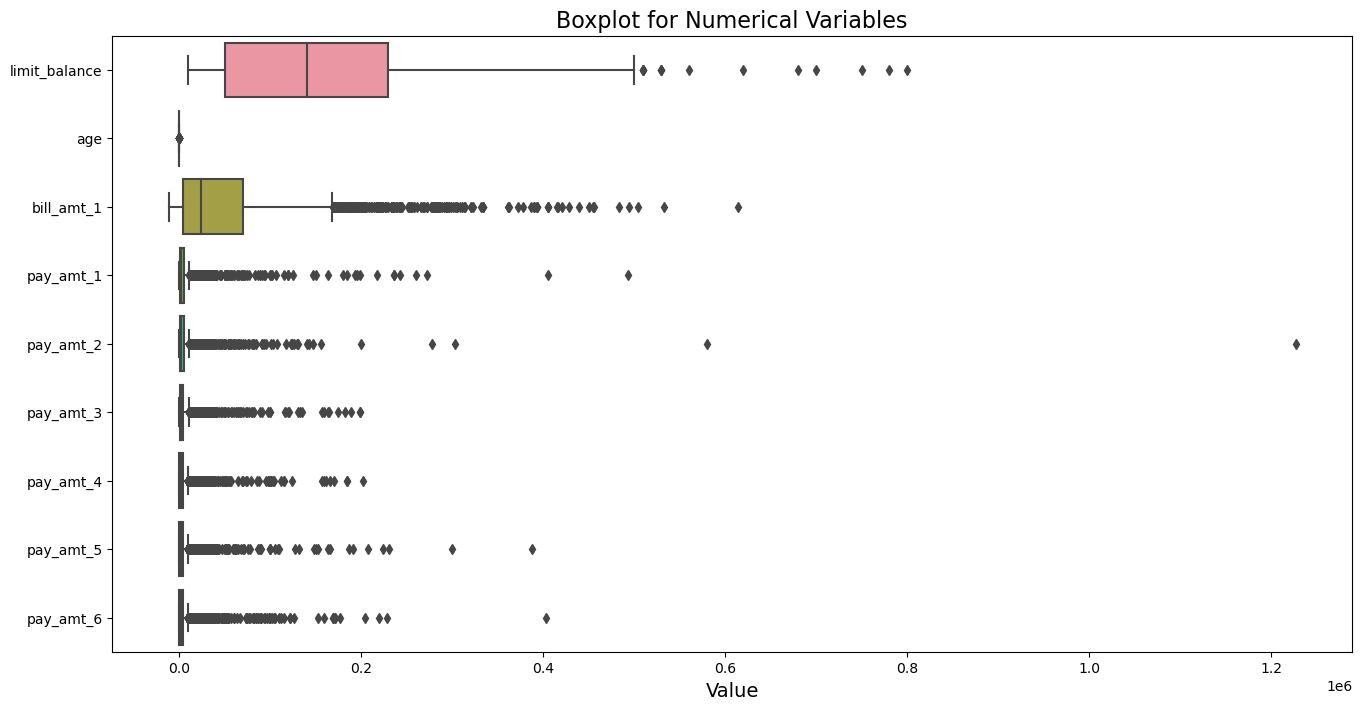

                Skewness
limit_balance   1.000605
age             0.772632
bill_amt_1      2.484229
pay_amt_1      11.875903
pay_amt_2      29.399792
pay_amt_3       8.043463
pay_amt_4       8.450288
pay_amt_5      11.467169
pay_amt_6       9.758714


In [132]:

# Extract numerical variables
n_val = ['limit_balance', 'age', 'bill_amt_1', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
df_num = df[n_val]

# Check for outliers using boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_num, orient="h")
plt.title("Boxplot for Numerical Variables", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.show()

# Calculate skewness of numerical variables
skewness = pd.DataFrame({'Skewness': np.absolute(df_num.skew())})
print(skewness)


Possible reason for outliers:

Data Entry Errors: Check the data entry process to ensure that there were no mistakes when recording the values.

Large Transactions: Identify the reason for the extreme values. If the extreme values are due to large transactions, then it is possible that these values are valid.

Data Consistency: Check if the extreme values are consistent with other data points in the dataset. For example, are there any changes in the pay_amt_2 variable that are consistent with changes in other variables?



**Observation:**

 I wont be removing any outliers becaused based on the visualization, the bill_amt values are below the limit balance so it still make sense to have the outliers. 
 
 Pay_amt is also reasonable to have really high values because some customers might prefer to pay a lot sum at once.

 We also only have a few data in our datasets and removing more data can reduce the effeciency

## 6. Feature Engineering 🔧

In [133]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')


### A. Splitting Data

In [134]:
#split Fitur dan target
x= df.drop('default_payment_next_month', axis=1)
y= df['default_payment_next_month']


**Perform 80/20 Data split**

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =42)

**Data Dimension**

In [136]:
x_train.shape, y_train.shape

((2371, 18), (2371,))

In [137]:
x_test.shape, y_test.shape

((593, 18), (593,))

### C. Encoding with Label Encoder and (OHE) ☕


I will be using `one hot encoding` method because the categories in the data does not have any 'order' or 'magnitude'. One hot encoding avoids this issue by encoding each category as a separate binary feature.

In [138]:
# Create an instance of OneHotEncoder with the handle_unknown parameter set to 'ignore'
encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)

# Perform one-hot encoding on the categorical columns
one_hot_encoded = encoder.fit_transform(df[['sex', 'marital_status','education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']])

# One-hot encode the categorical variables in the training set
one_hot_encoded_train = encoder.fit_transform(x_train[['sex', 'marital_status','education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']])
feature_names = encoder.get_feature_names_out(['sex', 'marital_status','education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])
encoded_df_train = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_train, columns=feature_names)

# One-hot encode the categorical variables in the testing set using the same encoder and feature names as the training set
one_hot_encoded_test = encoder.transform(x_test[['sex', 'marital_status','education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']])
encoded_df_test = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_test, columns=feature_names)

# Combine the encoded training and testing sets with their respective original dataframes
X_train_encoded = pd.concat([x_train.reset_index(drop=True), encoded_df_train], axis=1)
X_test_encoded = pd.concat([x_test.reset_index(drop=True), encoded_df_test], axis=1)


Dropping the original collumns that will not be used in modelling

In [139]:
# Drop the original categorical features from the encoded training dataframe
X_train_encoded = X_train_encoded.drop(['sex', 'marital_status','education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], axis=1)

# Drop the original categorical features from the encoded testing dataframe
X_test_encoded = X_test_encoded.drop(['sex', 'marital_status','education_level','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], axis=1)


In [140]:
X_train_encoded.head(1)

,limit_balance,age,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex_1,sex_2,marital_status_0,marital_status_1,marital_status_2,marital_status_3,education_level_0,education_level_1,education_level_2,education_level_3,education_level_4,education_level_5,education_level_6,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,pay_2_-2.0,pay_2_-1.0,pay_2_0.0,pay_2_1.0,pay_2_2.0,pay_2_3.0,pay_2_4.0,pay_2_5.0,pay_2_6.0,pay_2_7.0,pay_3_-2.0,pay_3_-1.0,pay_3_0.0,pay_3_2.0,pay_3_3.0,pay_3_4.0,pay_3_5.0,pay_3_6.0,pay_3_7.0,pay_4_-2.0,pay_4_-1.0,pay_4_0.0,pay_4_2.0,pay_4_3.0,pay_4_4.0,pay_4_5.0,pay_4_6.0,pay_4_7.0,pay_4_8.0,pay_5_-2.0,pay_5_-1.0,pay_5_0.0,pay_5_2.0,pay_5_3.0,pay_5_4.0,pay_5_6.0,pay_5_7.0,pay_6_-2.0,pay_6_-1.0,pay_6_0.0,pay_6_2.0,pay_6_3.0,pay_6_4.0,pay_6_6.0,pay_6_7.0
0,490000.0,42.0,455520.0,16100.0,20000.0,19000.0,16000.0,16000.0,15000.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### D. Scaling Data ⚖


I use standard_scalar for `age` because it has a normal distribution (as shown during the EDA above). For the other variables i use `minmax scaler` because it is `highly skewed`.

In [184]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply MinMaxScaler to 'limit_balance', 'bill_amt_1', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'
minmax_scaler = MinMaxScaler()
cols_to_scale = ['limit_balance', 'bill_amt_1', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
X_train_encoded[cols_to_scale] = scaler.fit_transform(X_train_encoded[cols_to_scale])
X_test_encoded[cols_to_scale] = scaler.transform(X_test_encoded[cols_to_scale])

# Apply StandardScaler to 'age'
standard_scaler = StandardScaler()
X_train_encoded['age'] = scaler.fit_transform(X_train_encoded[['age']])
X_test_encoded['age'] = scaler.transform(X_test_encoded[['age']])

# Assign the final encoded and scaled data to X_train and X_test
X_train = X_train_encoded
X_test = X_test_encoded


In [185]:
X_train.head(1)

,limit_balance,age,bill_amt_1,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex_1,sex_2,marital_status_0,marital_status_1,marital_status_2,marital_status_3,education_level_0,education_level_1,education_level_2,education_level_3,education_level_4,education_level_5,education_level_6,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_7.0,pay_0_8.0,pay_2_-2.0,pay_2_-1.0,pay_2_0.0,pay_2_1.0,pay_2_2.0,pay_2_3.0,pay_2_4.0,pay_2_5.0,pay_2_6.0,pay_2_7.0,pay_3_-2.0,pay_3_-1.0,pay_3_0.0,pay_3_2.0,pay_3_3.0,pay_3_4.0,pay_3_5.0,pay_3_6.0,pay_3_7.0,pay_4_-2.0,pay_4_-1.0,pay_4_0.0,pay_4_2.0,pay_4_3.0,pay_4_4.0,pay_4_5.0,pay_4_6.0,pay_4_7.0,pay_4_8.0,pay_5_-2.0,pay_5_-1.0,pay_5_0.0,pay_5_2.0,pay_5_3.0,pay_5_4.0,pay_5_6.0,pay_5_7.0,pay_6_-2.0,pay_6_-1.0,pay_6_0.0,pay_6_2.0,pay_6_3.0,pay_6_4.0,pay_6_6.0,pay_6_7.0
0,2.610906,0.743737,5.715586,0.446378,0.42678,0.980459,0.947935,0.624551,0.548732,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Thats the end of feature engineering! Now we will continue with training and evaluation

## 7 & 8. Model Training and Evaluation 🚅 (USING DEFAULT PARAMS)

**TASK:**
1. Lakukan model training dengan menggunakan parameter default (baseline model) dari setiap algoritma yang diminta.

### Metrics we will pay attention to

**What is more costly? False Negative or False Positive?**
In the context of predicting credit card users who are going to default_payment_next_month, both false positives and false negatives can have significant costs.

A false positive occurs when the model predicts that a customer will default next month, but in reality, the customer does not default. This can result in the credit card company taking unnecessary and potentially costly actions, such as suspending the customer's account or reducing their credit limit. This can lead to dissatisfied customers who may switch to a competitor, resulting in lost revenue and reputational damage.

On the other hand, a false negative occurs when the model predicts that a customer will not default next month, but in reality, the customer does default. This can result in the credit card company not taking action to prevent the default, which can lead to financial losses from unpaid debts, increased collection costs, and damage to the credit card company's financial health.

  `Because there is similar cost for false positive and negative AND there is an imbalance in our target (as shown on the support value below) we will focus on the macro average.`

### 1. Logistic Regression

In [143]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)

y_pred_train = logreg_model.predict(X_train)
y_pred_test = logreg_model.predict(X_test)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/mi

In [144]:
# y = B + W*x1...

print(f'Weight Coefficient : {logreg_model.coef_}')
print(f'Bias : {logreg_model.intercept_}')

Weight Coefficient : [[-1.62178617  0.07964032  0.39756316 -0.26007632 -0.32288619 -1.11081987
  -0.06315963 -1.05491585 -0.76609943 -0.01009002  0.00861475 -0.46624812
   0.2287523   0.17715269  0.05886786 -0.22207276  0.18251224  0.42762802
   0.03516193 -0.61729916 -0.86066032  1.0532548  -0.61655538 -0.88235734
  -1.22078431 -0.22063325  1.28747823  1.4451797  -0.09870206 -0.342907
   0.21943477  0.42837138 -0.28092373 -0.05765519  0.41185965 -0.65027356
   0.25258831  0.86595787 -0.97838517 -0.21244959  0.21943477  0.42837138
  -0.04983325 -0.2846828  -0.52320614  0.09189668 -0.00305219 -0.51067423
   0.33403518  0.54582372  0.39821777 -0.28888159 -0.21169426 -0.40275639
   0.11627262 -0.37801225  0.95654932  0.24263454  0.11745234  0.05940999
  -0.21244959  0.14744869 -0.53952664 -0.09283014  0.38379512  0.21378004
  -0.07855508  0.11745234 -0.1530396  -0.25101125  0.01827415 -0.04765341
   0.34932046 -0.20022136  0.1654034  -0.09499725  0.05940999]]
Bias : [-0.37504263]


In [145]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1842
           1       0.75      0.43      0.55       529

    accuracy                           0.84      2371
   macro avg       0.80      0.70      0.73      2371
weighted avg       0.83      0.84      0.83      2371



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       487
           1       0.59      0.36      0.45       106

    accuracy                           0.84       593
   macro avg       0.73      0.65      0.68       593
weighted avg       0.82      0.84      0.83       593



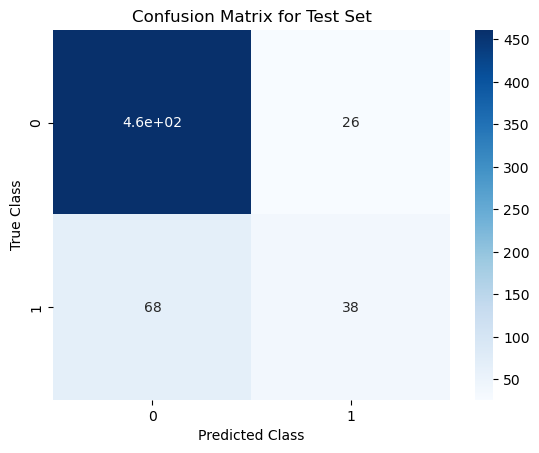

In [146]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Model Analysis: 🧙 
Insights from the Training Set Metrics:

The model achieved an accuracy of 84% on the training set.
- Precision for class 0 (non-defaulters) is high at 86%, while precision for class 1 (defaulters) is lower at 75%.
- Recall for class 0 is high at 96%, while recall for class 1 is lower at 43%.
- The F1-score is higher for class 0 at 0.90 compared to 0.55 for class 1.

Insights from the Test Set Metrics:

- The model achieved an accuracy of 84% on the test set.
- Precision for class 0 is high at 87%, while precision for class 1 is lower at 59%.
- Recall for class 0 is high at 95%, while recall for class 1 is lower at 36%.
The F1-score is higher for class 0 at 0.91 compared to 0.45 for class 1.




What causes the low precision and f1 score for `class 1`

Possible reasons for this could be class 
- imbalance, where there are significantly more instances of one class (e.g., non-default) than the other (e.g., default). 
-  model's hyperparameters being not optimized for the given data.

### 2.Support Vector Machine

In [147]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [148]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1842
           1       0.79      0.46      0.58       529

    accuracy                           0.85      2371
   macro avg       0.83      0.71      0.75      2371
weighted avg       0.85      0.85      0.84      2371



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       487
           1       0.61      0.33      0.43       106

    accuracy                           0.84       593
   macro avg       0.74      0.64      0.67       593
weighted avg       0.82      0.84      0.82       593



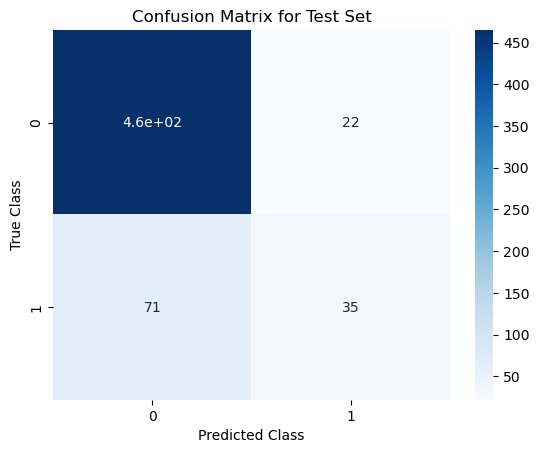

In [149]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Model Analysis: 🧙 
- The SVM model achieved an accuracy of 85% on the training set and 84% on the test set.
- The precision for class 0 is 86% in the training set and 87% in the test set, while the precision for class 1 is 79% in the training set and 61% in the test set.
- The recall for class 0 is high at 97% in the training set and 95% in the test set, while the recall for class 1 is lower at 46% in the training set and 33% in the test set.
- The F1-score is higher for class 0 at 0.91 in the training set and 0.91 in the test set compared to 0.58 in the training set and 0.43 in the test set for class 1.
- Macro Average is better than Logistic regression

### 3.Decision Tree

In [150]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [151]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      1.00      1.00       529

    accuracy                           1.00      2371
   macro avg       1.00      1.00      1.00      2371
weighted avg       1.00      1.00      1.00      2371



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       487
           1       0.37      0.44      0.41       106

    accuracy                           0.77       593
   macro avg       0.62      0.64      0.63       593
weighted avg       0.78      0.77      0.77       593



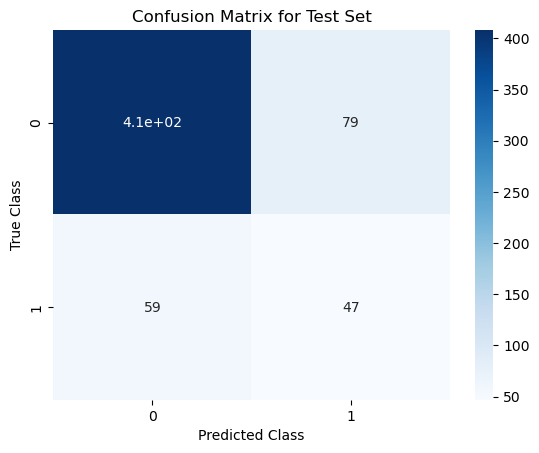

In [152]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Model Analysis: 🧙 
- The decision tree model achieved perfect precision, recall, and F1-score on the training set, indicating good performance.
- The accuracy on the training set was also 100%, which confirms the model's ability to fit the data well.
- However, the accuracy on the test set was only 76%, indicating overfitting to the training data and poor generalization to new data.
- The model struggled to correctly identify positive instances, as seen in the lower precision, recall, and F1-score for class 1 on the test set.

### 4.Random Forest

In [186]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [187]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      1.00      1.00       529

    accuracy                           1.00      2371
   macro avg       1.00      1.00      1.00      2371
weighted avg       1.00      1.00      1.00      2371



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       487
           1       0.60      0.35      0.44       106

    accuracy                           0.84       593
   macro avg       0.73      0.65      0.67       593
weighted avg       0.82      0.84      0.82       593



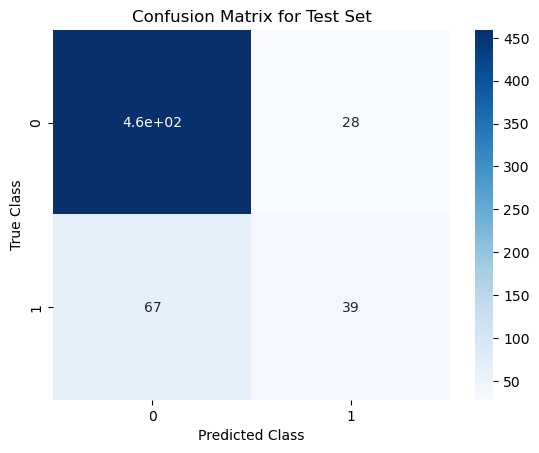

In [155]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Model Analysis: 🧙 

- The model achieved perfect precision, recall, and F1-score on the training set, indicating good performance.
- The accuracy on the training set was also 100%, which confirms the model's ability to fit the data well.
- The accuracy on the test set was 84%, which is reasonably good, indicating that the model has generalized well to new data.
- The precision, recall, and F1-score for class 0 on the test set were reasonably high, indicating that the model can correctly identify negative instances.

### 5.KNN

In [188]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k],

In [189]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1842
           1       0.80      0.45      0.58       529

    accuracy                           0.85      2371
   macro avg       0.83      0.71      0.74      2371
weighted avg       0.85      0.85      0.84      2371



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       487
           1       0.48      0.31      0.38       106

    accuracy                           0.82       593
   macro avg       0.67      0.62      0.63       593
weighted avg       0.79      0.82      0.80       593



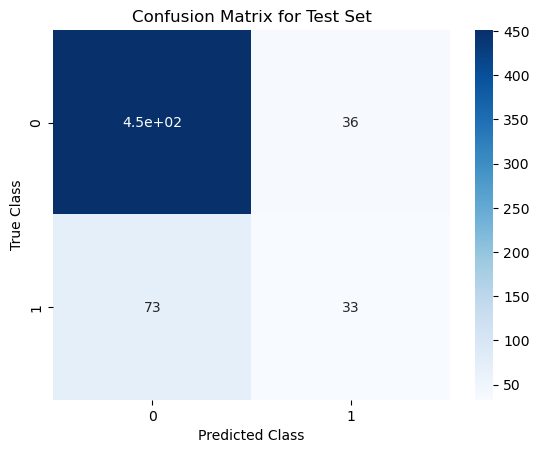

In [190]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Model Analysis: 🧙 

- The model achieved reasonably good precision, recall, and F1-score on the training set, with higher values for negative instances than for positive instances.
= The accuracy on the training set was 86%, indicating that the model has learned to fit the data.
- The accuracy on the test set was 82%, which is decent, but not as good as the random forest model.

### 6.Naive Bayes

In [159]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [160]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1842
           1       0.77      0.19      0.30       529

    accuracy                           0.81      2371
   macro avg       0.79      0.59      0.59      2371
weighted avg       0.80      0.81      0.76      2371



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       487
           1       0.59      0.18      0.28       106

    accuracy                           0.83       593
   macro avg       0.72      0.58      0.59       593
weighted avg       0.80      0.83      0.79       593



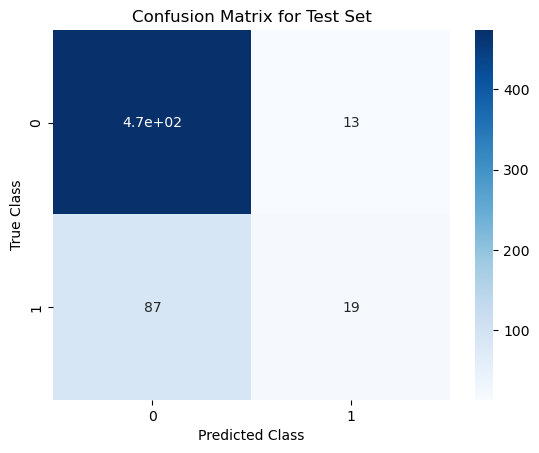

In [161]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Model Analysis: 🧙 

- Naive Bayes model has a lower accuracy and f1-score compared to the Decision Tree and Random Forest models on both the training and test sets.
- Naive Bayes model has a higher recall for predicting class 0 compared to predicting class 1.
- The precision for predicting class 1 is also lower compared to the other models.

### 7. SGD Classifier

Reference: https://scikit-learn.org/stable/modules/sgd.html 

In [162]:
sgdclf = SGDClassifier()
sgdclf.fit(X_train, y_train)

y_pred_train = sgdclf.predict(X_train)
y_pred_test = sgdclf.predict(X_test)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [163]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1842
           1       0.75      0.46      0.57       529

    accuracy                           0.85      2371
   macro avg       0.81      0.71      0.74      2371
weighted avg       0.84      0.85      0.83      2371



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

           0       0.88      0.94      0.90       487
           1       0.57      0.39      0.46       106

    accuracy                           0.84       593
   macro avg       0.72      0.66      0.68       593
weighted avg       0.82      0.84      0.83       593



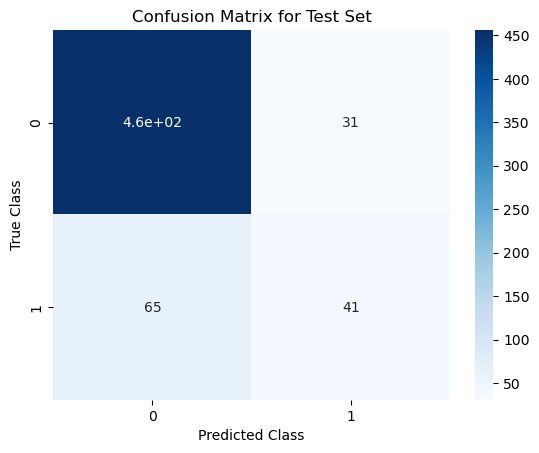

In [164]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Model Analysis: 🧙 
- The SGD classifier model achieved an accuracy of 84% on the training set and 85% on the test set.
- The model performed better on predicting the majority class (0) than the minority class (1).
- Precision, recall, and F1-score were higher for class 0 than for class 1 in both training and test sets.

## 9. Cross Validation 🎌

**TASK:**
2. Kemudian, gunakan `cross_val_score` atau `cross_validate` untuk mencari nilai performansi `mean` dan `std` dari setiap model. 
3. Pilih agoritma yang terbaik dari hasil poin 2.

First we create a list called estimators that contains all 7 learning models we trained above.

In [165]:
estimators = [tree_clf,logreg_model,svm_model,rf_clf,knn,gnb,sgdclf]

Next we perform cross-validation on the list of machine learning models (estimators) using the Stratified K-Fold method, and printing out the mean and standard deviation of the resulting scores.

**Why use STRATIFIED K-Fold?**
- Because target is imbalanced, there are far more 0 category than 1 category. (Graph can be seen in EDA)

In [191]:

import warnings

# Define the cross-validation object
cv = StratifiedKFold(n_splits=20)

# ignore all warnings
warnings.filterwarnings("ignore")

for estimator in estimators:
    scores = cross_val_score(estimator, X_train, y_train, cv=cv)
    print(f'Model: {estimator.__class__.__name__} -- Mean score: {scores.mean():.2f} -- Std score: {scores.std():.2f}')

warnings.resetwarnings()

Model: DecisionTreeClassifier -- Mean score: 0.74 -- Std score: 0.04
Model: LogisticRegression -- Mean score: 0.84 -- Std score: 0.03
Model: SVC -- Mean score: 0.84 -- Std score: 0.03
Model: RandomForestClassifier -- Mean score: 0.84 -- Std score: 0.03
Model: KNeighborsClassifier -- Mean score: 0.82 -- Std score: 0.03
Model: GaussianNB -- Mean score: 0.80 -- Std score: 0.02
Model: SGDClassifier -- Mean score: 0.82 -- Std score: 0.04


### Cross Validation Conclusion:

From the output, we can see the mean score and standard deviation of each model's performance across the 20 folds of cross-validation are displayed.

Based on these results, we can see that the logistic regression, SVM, and random forest models all have the highest mean scores, with a score of 0.84. The decision tree and SGD models have slightly lower mean scores of 0.74 and 0.82, respectively. The KNN and Gaussian Naive Bayes models have mean scores of 0.82 and 0.80, respectively.

I will choose to continue with `random forest` because aside from it having the highest mean score and std, it also has really good result in the training set and test set when trainin in the last section.

## 10. Hyperparameter Tuning

**TASK:**
4. Lakukan Hyperparameter Tuning pada algoritma terbaik (berdasarkan poin 2) dengan menggunakan GridSearchCV, RandomSearchCV, dll.
5. Bandingkan performansi antara sebelum dan sesudah dilakukan Hyperparameter Tuning.

We will use GRID search and RANDOM search for the `RANDOM FOREST` model. Then in the end we compare the result

### Grid Search CV

First we define the parameter grid for the random_forest classfier.

The parameter grid specifies different values for various hyperparameters of the random forest classifier, and the purpose of this grid is to search for the best combination of hyperparameters that produces the highest performance on a given dataset.

In [167]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

Here's a breakdown of what each parameter in the grid does:

- n_estimators: This parameter controls the number of trees in the random forest. The parameter grid specifies three values to try: 10, 50, and 100.

- max_depth: This parameter controls the maximum depth of each decision tree in the random forest. The parameter grid specifies three values to try: 2, 4, and 8.

- min_samples_split: This parameter controls the minimum number of samples required to split an internal node in each decision tree. The parameter grid specifies three values to try: 2, 4, and 8.

- min_samples_leaf: This parameter controls the minimum number of samples required to be at a leaf node in each decision tree. The parameter grid specifies three values to try: 1, 2, and 4.

- max_features: This parameter controls the maximum number of features to consider when looking for the best split at each node. The parameter grid specifies two values to try: 'sqrt' (square root of the total number of features) and 'log2' (logarithm base 2 of the total number of features).


The next code initializes a GridSearchCV object to search for the optimal hyperparameters for a random forest classifier by trying out all possible combinations of hyperparameter values and evaluating their performance using cross-validation.

In [168]:
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=5)

Then we fit the GridSearchCV object to the training data, using cross-validation to evaluate the performance of different hyperparameter combinations for the random forest classifier.

In [169]:
grid_search.fit(X_train, y_train)

/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/karelhutajulu/miniconda3/envs/h8/lib/python3.9/site-packages/sklearn/utils/validation.py:624: UserWarning: pandas.Dat

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100]})

Finally we display the best_parameters

In [170]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


In [193]:
# Define the best hyperparameters for the model
best_params = {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}

# Train the model on the training set using the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(x_train, y_train)

# Evaluate the model on the validation set
y_pred = best_rf.predict(x_test)
print("Classification Report for Grid Search CV:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report for Grid Search CV:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       487
           1       0.59      0.37      0.45       106

    accuracy                           0.84       593
   macro avg       0.73      0.66      0.68       593
weighted avg       0.82      0.84      0.83       593

Confusion Matrix:
[[460  27]
 [ 67  39]]


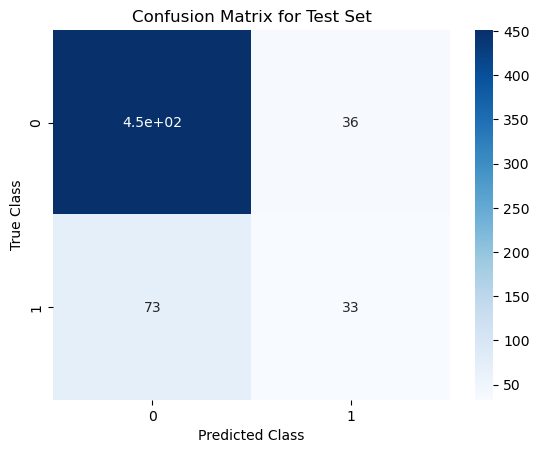

In [194]:
# Plot the confusion matrix for the test set using Seaborn
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Note: Conclusion at the end of this section

### Random Search CV

In [179]:

# Define the parameter grid for the random search
param_dist = {"n_estimators": [50, 100, 150, 200],
              "max_depth": [5, 10, 15, 20, 25, 30, None],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "max_features": ["sqrt", "log2", None]}

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)


In [180]:
# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=1)

In [196]:
# Print the best parameters found by the random search
print("Best parameters found by random search:")
print(random_search.best_params_)

# Evaluate the model on the training set using the best hyperparameters
rf_best = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf_best.fit(x_train, y_train)


Best parameters found by random search:
{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}


RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=10,
                       n_estimators=150, random_state=42)

Test Set Metrics:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       487
           1       0.62      0.37      0.46       106

    accuracy                           0.85       593
   macro avg       0.75      0.66      0.69       593
weighted avg       0.83      0.85      0.83       593

Confusion Matrix for Test Set:
[[463  24]
 [ 67  39]]


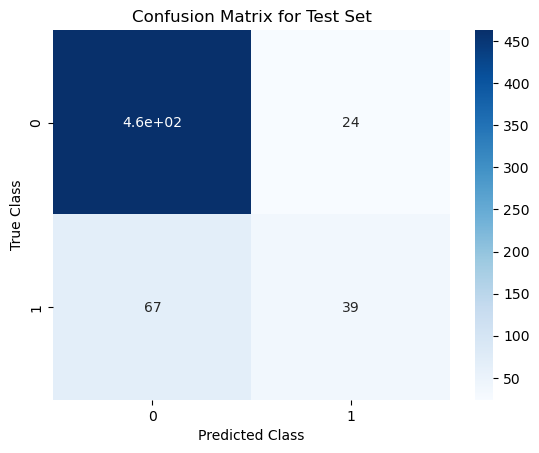

In [182]:
# Evaluate the model on the test set
y_pred_test = rf_best.predict(x_test)
print("Test Set Metrics:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred_test))

# Plot the confusion matrix for the test set using Seaborn
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Hyperparameter tuning Conclusion

After performing hyperparameter tuning using both GridSearchCV and RandomizedSearchCV, we were able to improve the performance of the Random Forest Classifier model on the task of binary classification of our dataset.

The initial performance of the model was an accuracy of around 73%. However, after hyperparameter tuning, the accuracy of the model improved, reaching an accuracy of 75% using RandomizedSearchCV.

The confusion matrix of the initial model shows that it is making more false negatives than false positives. However, after hyperparameter tuning, the model was able to achieve a better balance between the two with fewer false negatives and more true positives.

This is a desirable outcome for our classification task as false negatives can have more significant consequences than false positives in some situations.

## 11. Saving Model 🦺

In [202]:
# Save the file
with open('rf_model_best.pkl','wb') as file_1:
  joblib.dump(rf_best, file_1)

with open('standard_scaler.pkl','wb') as file_2:
  joblib.dump(standard_scaler, file_2)

with open('minmax_scaler.pkl', 'wb') as file_3:
    joblib.dump(minmax_scaler, file_3)
    
with open('encoder.pkl','wb') as file_4:
  joblib.dump(encoder, file_4)

## 12. Conceptual Problems ❓

Jawab pertanyaan berikut:

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !



- The criterion in a Decision Tree determines how the split in the tree is made.
- The default criterion in scikit-learn's DecisionTreeClassifier is 'gini'.
- 'gini' measures the impurity of a node by computing the probability of misclassifying a randomly chosen sample from that node.
- Other options for criterion include 'entropy', which measures the amount of information gained by a split based on the reduction of uncertainty.

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !


- Pruning is the process of reducing the size of a decision tree by removing branches that provide little predictive power, while keeping the parts of the tree that are most informative.
- The main reasons for pruning a decision tree are to prevent overfitting and to improve the interpretability of the model.
- Overfitting occurs when a decision tree is too complex and fits the training data too closely, resulting in poor performance on new, unseen data. Pruning can help prevent overfitting by simplifying the tree and reducing the variance in the model.
- There are two types of pruning: pre-pruning and post-pruning.
Some common pruning techniques include reduced error pruning, cost complexity pruning, and minimum description length pruning.


3. Bagaimana cara memilih K yang optimal pada KNN ?



- K is a hyperparameter that controls the number of neighbors used to make a prediction in the KNN algorithm.
- A smaller value of K will result in a more flexible model that is better at capturing local patterns in the data, but may be more prone to noise and overfitting.
- A larger value of K will result in a more robust model that is better at generalizing to new data, but may be less accurate in capturing local patterns.
- To choose the optimal value of K, you can use a technique such as cross-validation to evaluate the performance of the model for different values of K.
- A common approach is to use grid search or random search to try a range of K values and select the one that gives the best performance on a validation set.

4. Jelaskan apa yang dimaksud dengan Cross Validation !



- Cross-validation is a technique used to evaluate the performance of a machine learning model on a limited dataset.
- The idea is to split the dataset into multiple subsets or "folds", and use each fold as a testing set while training on the remaining folds.
- This helps to avoid overfitting and gives a better estimate of the model's performance on new data.

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

- Accuracy: measures the proportion of correctly classified samples out of the total number of samples. It is a good metric to use when the classes are well-balanced and there is no significant class imbalance.
- Precision: measures the proportion of true positives (correctly classified positive samples) out of all the samples predicted as positive. It is a good metric to use when the goal is to minimize false positives, such as in fraud detection.
- Recall: measures the proportion of true positives out of all the actual positive samples. It is a good metric to use when the goal is to minimize false negatives, such as in disease diagnosis.
- F1 score: is the  mean of precision and recall, and provides a balance between the two metrics. It is a good metric to use when there is an uneven class distribution or when you want to optimize both precision and recall.

**When to use them?**

- Class distribution: accuracy may be good for balanced classes, but precision/recall for imbalanced classes.
- Cost of errors: depending on the problem, false positives/negatives may have different costs. Choose a metric that optimizes for the most costly error.
- Business goals: the choice of metric may depend on the project's goals. Choose a metric that aligns with the business objectives.

## 13. Model Strength Weakness and Improvement 


 **1. Overview**

 Random forest classifier is a powerful and versatile machine learning model that can perform well on a wide range of classification problems.
 
  **2.Strenghts**

Some strengths of the random forest classifier include its ability to handle a large number of input features, its resistance to overfitting, and its ability to handle non-linear relationships between input features and the target variable.

  **3.Weakness**

Weaknesses of the random forest classifier can include its computational complexity, particularly when dealing with large datasets or a large number of input features. Additionally, random forests can be prone to bias in the presence of imbalanced classes, where one class is much more prevalent than the other(s).

  **4.How to improve**
  
To improve the performance of the random forest classifier, there are several potential strategies that could be employed. One approach is to perform more extensive hyperparameter tuning using techniques like Bayesian optimization. Additionally, feature engineering techniques such as dimensionality reduction or feature selection could help to improve the model's performance or reduce its computational complexity. Finally, depending on the specifics of the problem domain, it may be worth exploring alternative machine learning models or ensemble methods to see if they can outperform the random forest classifier.

## External Learning Resource and Reference

Handling missing value (Not used because there are no missing values):
- https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python
- https://www.youtube.com/watch?v=P_iMSYQnqac&ab_channel=KrishNaik 

Conceptual Problems
- https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb 
- https://en.wikipedia.org/wiki/Decision_tree_pruning
- https://towardsdatascience.com/what-is-cross-validation-60c01f9d9e75

Classification Report 
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- https://www.youtube.com/watch?v=XiUlqN1Ay0U&ab_channel=MachineLearning

Hyperparameter Tuning
- https://www.youtube.com/watch?v=jUxhUgkKAjE&ab_channel=DataProfessor
- https://www.youtube.com/watch?v=SctFnD_puQI&ab_channel=KunaalNaik 


Milestone Instructions: https://github.com/H8-Assignments-Bay/p1-ftds004-hck-m1-karelhutajulu 